# Exercise Sheet 6

## Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_svd_ours(A):
    """Computes the Singular Value Decomposition (SVD) of a given matrix A.

        Args:
            A: A numpy array representing the matrix to decompose.

        Returns:
            A tuple of three numpy arrays: U, S, and Vh, representing the left singular
            matrix, the singular values, and the right singular matrix (transposed),
            respectively.
    """
    m, n = A.shape
    p = min(m,n)
    
    A_conj_T = np.conj(A).T
    
    Sigma_squared_v, V = np.linalg.eig(A_conj_T@A)
    # Get the indices that orders the eigenvectors/values in descending order
    idx_v = np.argsort(-Sigma_squared_v) # orders from largest to smallest
    
    # Order the eigen vectors and values of V
    Sigma_squared_v = Sigma_squared_v[idx_v]
    V = V[:,idx_v]
    
    # Select only the non-zero eigenvalues and their associated eigenvectors
    Sigma_squared_v = Sigma_squared_v[:p]
    V = V[:,:p]
    Vh = np.conj(V).T # Note that we return the conjugate transpose of V.
    
    Sigma_squared_u, U = np.linalg.eig(A@A_conj_T)
    # Get the indices that orders the eigenvectors/values in descending order
    idx_u = np.argsort(-Sigma_squared_u) # orders from largest to smallest
    
    # Order the eigen vectors and values of U
    Sigma_squared_u = Sigma_squared_u[idx_u]
    U = U[:,idx_u]
    
    # Select only the non-zero eigenvalues and their associated eigenvectors
    Sigma_squared_u = Sigma_squared_u[:p]
    U = U[:,:p]
    
    # To get S (Sigma), we need to take the square-roort of Sigma_square.
    # You may consult your week 6 lecture notes for any clarification.
    S = np.sqrt(Sigma_squared_v)
    
    print(f"U =\n{U}")
    print(f"S =\n{S}")
    print(f"V =\n{Vh}")
    
    return U, S, Vh

In [3]:
def compute_svd(A):
    """Computes the Singular Value Decomposition (SVD) of a given matrix A.

        Args:
            A: A numpy array representing the matrix to decompose.

        Returns:
            A tuple of three numpy arrays: U, S, and Vh, representing the left singular
            matrix, the singular values, and the right singular matrix (transposed),
            respectively.
    """

    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U, S, Vh


In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])

# Compute the SVD of A.
U, S, Vh = compute_svd(A)

# Print the results.
print("U:")
print(U)

print("S:")
print(S)

print("Vh:")
print(Vh)


U:
[[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
S:
[9.508032   0.77286964]
Vh:
[[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]]


In [5]:
USV = U @ np.diag(S) @ Vh

print(np.allclose(USV, A))

print(USV)

True
[[1. 2. 3.]
 [4. 5. 6.]]


In [6]:
# Using our own compute SVD function
U, S, Vh = compute_svd_ours(A)

U =
[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
S =
[9.508032   0.77286964]
V =
[[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]]


## Comment
Note that for `U[:,1]` in `compute_svd_ours(A)`, we get the vector `[-0.92236578 0.3863177]^T`
But the other algorithm (`compute_svd(A)`) gets `U[:,1] = [0.92236578 -0.3863177]^T`.

This is due to a feature of eigenvectors. Here's the explanation:
For a matrix $A$, the eigenvector $x$ (and the corresponding eigenvalue $\lambda$ satisfies the equation:
\begin{equation}
 Ax = \lambda x
\end{equation}

But the negative eivenvector $-x$ also satisfies the equation (see below).

\begin{equation}
 A(-x) = \lambda (-x) \rightarrow Ax = \lambda x
\end{equation}

So, if $x$ is an eigenvector of a matrix $A$, $-x$ is also an eigenvector.

We see that this affects our result when we try to reconstruct $A$ from $\hat{U}$, $\hat{\Sigma}$ and $\hat{V}$. ie. $A = \hat{U}\hat{\Sigma}\hat{V}^T$

In [7]:
USV = U @ np.diag(S) @ Vh

print(np.allclose(USV, A))
print(USV)

False
[[2.14909257 2.16022777 2.17136296]
 [3.51872152 4.93289124 6.34706096]]


But if we set `U[:,1] = -U[:,1]` , we would successfully reconstruct the matrix, $A$.

In [8]:
U[:,1] = -U[:,1]

USV = U @ np.diag(S) @ Vh

print(np.allclose(USV, A))
print(USV)

True
[[1. 2. 3.]
 [4. 5. 6.]]


## Question 3

### a) Python function to compute the pseudo-inverse of A:

In [9]:
def pseudo_inverse(A):
    """Computes the pseudo-inverse of a matrix A.

    Args:
        A: A 2D NumPy array.

    Returns:
        A 2D NumPy array, the pseudo-inverse of A.
    """

    return np.linalg.inv(A.T@A)@A.T

### b) Python function to use the pseudo-inverse to find the solution $x = A^† b$:

In [10]:
def solve_lsq_with_pseudo_inverse(A, b):
    """
    Solve the least-squares problem Ax = b using the pseudo-inverse of A.

    Args:
        A: A NumPy array representing the matrix A.
        b: A NumPy array representing the vector b.

    Returns:
        A NumPy array representing the solution x to the least-squares problem Ax = b.
    """

    A_pinv = pseudo_inverse(A)
    return A_pinv @ b


### Verify the computed pseudo-inverse and solution with NumPy's built-in least squares solver:

In [11]:
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

# Compute the pseudo-inverse of A using the custom function.
A_pinv = pseudo_inverse(A)

# Compute the solution to the least-squares problem using the pseudo-inverse.
x = solve_lsq_with_pseudo_inverse(A, b)

# Compute the solution to the least-squares problem using NumPy's built-in solver.
x_numpy, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# Verify that the computed pseudo-inverse and solution match the NumPy results.
assert np.allclose(A_pinv, np.linalg.pinv(A))
print("Pseudo-inverse matches!")
assert np.allclose(x, x_numpy)
print("\nComputed solution matches with Numpy!")

Pseudo-inverse matches!

Computed solution matches with Numpy!


### c) Compute the condition number $κ_2(A)$ of matrix A:

In [12]:
def compute_condition_number(A):
    """
    Compute the condition number κ_2(A) of a matrix A.

    Args:
        A: A NumPy array representing the matrix A.

    Returns:
        The condition number κ_2(A) of the matrix A.
    """

    return np.linalg.norm(A,'fro')*np.linalg.norm(pseudo_inverse(A),'fro')

condition_number_ours = compute_condition_number(A)
condition_number_numpy = np.linalg.cond(A,'fro')

# Confirm the computed condition number with NumPy's built-in function.
assert np.allclose(condition_number_ours, condition_number_numpy)
print("The condition number of A computed using our own function is:")
print(condition_number_ours)

print("\nThe condition number of A computed using numpy.linalg.cond is:")
print(condition_number_numpy)
print("\nCondition numbers are identical!")

The condition number of A computed using our own function is:
14.999999999999984

The condition number of A computed using numpy.linalg.cond is:
14.999999999999998

Condition numbers are identical!


### d) Generate a small perturbation $∆b = [δ, δ]$ for a range of $δ$ values and compute the corresponding $∆x$ for each:

In [13]:
def generate_perturbation(delta):
    """
    Generate a small perturbation ∆b = [δ, δ] for a given δ value.

    Args:
        delta: The value of δ.

    Returns:
        A NumPy array representing the perturbation ∆b.
    """

    return np.array([delta, delta])

def compute_delta_x(A, b, perturb):
    """
    Compute the perturbed solution ∆x to the least-squares problem Ax = b for a given δ value.

    Args:
        A: A NumPy array representing the matrix A.
        b: A NumPy array representing the vector b.
        perturb: The perturbation [δ,δ].

    Returns:
        A NumPy array representing the perturbed solution ∆x.
    """

    b_perturbed = b + perturb
    x_perturbed = solve_lsq_with_pseudo_inverse(A, b_perturbed)
    
    return x_perturbed - x


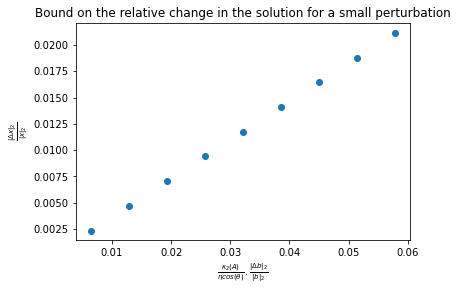

In [14]:
# Generate a range of δ values.
delta_values = np.arange(0.01, 0.1, 0.01)

# Compute eta.
eta = np.linalg.norm(A,'fro')*np.linalg.norm(x,2)/np.linalg.norm(A@x,2)

# Compute the cosine of the angle between A and b.
cos_theta = np.linalg.norm(A@x,2) / np.linalg.norm(b, 2)

# Compute condition number k_2
k_2 = compute_condition_number(A)

# Compute |∆x|_2/|x|_2 and (κ_2(A)/η cos(θ))* (|∆b|_2/|b|_2) for each δ value.
norm_delX_norm_x = []
bound_values = []
for delta in delta_values:
    perturbation = generate_perturbation(delta)
    delta_x = compute_delta_x(A, b, perturbation)
    delta_x_norm = np.linalg.norm(delta_x, 2)
    x_norm = np.linalg.norm(x, 2)
    norm_delX_norm_x.append(delta_x_norm/x_norm)

    bound_item = (k_2/(eta*cos_theta)) * (np.linalg.norm(perturbation,2)/np.linalg.norm(b,2))
    bound_values.append(bound_item)

# Plot |∆x|_2/|x|_2 versus (κ_2(A)/η cos(θ))* (|∆b|_2/|b|_2).
plt.plot(bound_values, norm_delX_norm_x, 'o')
plt.xlabel(r'$\frac{\kappa_2(A)}{\eta cos(\theta)} . \frac{|\Delta b|_2}{|b|_2}$')
plt.ylabel(r'$\frac{|\Delta x|_2}{|x|_2}$')
plt.title('Bound on the relative change in the solution for a small perturbation')
plt.show()


### e) A function implementing LSQ SVD algorithm, and verifying it gives the same solution as before for the given $A$ and $b$.

In [15]:
def lsq_svd(A, b):
    """Computes the least squares solution to the linear system Ax = b using the SVD.

    Args:
        A: A 2D NumPy array, the matrix A.
        b: A 2D NumPy array, the vector b.

    Returns:
        A 2D NumPy array, the least squares solution x.
    """

    # Compute the SVD of A.
    U, S, VT = compute_svd(A)

    # Compute the inverse of S.
    S_inv = np.diag(1 / S)

    # Compute the pseudo-inverse of A.
    A_pinv = VT.T @ S_inv @ U.T

    # Compute the least squares solution x.
    x = A_pinv @ b

    return x


In [16]:
"""Verifies that the LSQ SVD algorithm gives the same solution as before for the given A and b."""

# Compute the least squares solution using the LSQ SVD algorithm.
x_svd = lsq_svd(A, b)

# Compute the least squares solution using the solve_lsq_with_pseudo_inverse function.
x_lsq_pseudo = solve_lsq_with_pseudo_inverse(A, b)

# Verify that the two solutions are equal.
assert np.allclose(x_svd, x_lsq_pseudo)

print(f"The least squares solution using the LSQ SVD algorithm is {x_svd}.")

print(f"The least squares solution using the lsq w/ pseudo_inverse is {x_lsq_pseudo}.")


The least squares solution using the LSQ SVD algorithm is [-4.   4.5].
The least squares solution using the lsq w/ pseudo_inverse is [-4.   4.5].


As you can see, the two solutions are identical.

The complexity of the LSQ SVD algorithm can be analyzed as follows:

* The SVD of A is computed using numpy.linalg.svd, which has a complexity of $O(mn^2)$.
* The inverse of S is computed using numpy.diag, which has a complexity of $O(n)$.
* The pseudo-inverse of A is computed using matrix multiplication, which has a complexity of $O(mn^2)$.
* The least squares solution x is computed using matrix multiplication, which has a complexity of $O(mn^2)$.

Therefore, the overall complexity of the LSQ SVD algorithm is $O(mn^2)$.